### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head()

missing_values = df.isnull().sum()
data_types = df.dtypes
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
orderdate_conversion_issues = df['OrderDate'].isnull().sum()
missing_values, data_types, orderdate_conversion_issues

(OrderID         0
 Product         0
 Category        0
 Quantity        0
 Price           0
 CustomerID      0
 Birthdate       0
 OrderDate       0
 Country         0
 DiscountRate    1
 dtype: int64,
 OrderID           int64
 Product          object
 Category         object
 Quantity          int64
 Price             int64
 CustomerID        int64
 Birthdate        object
 OrderDate        object
 Country          object
 DiscountRate    float64
 dtype: object,
 np.int64(0))

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

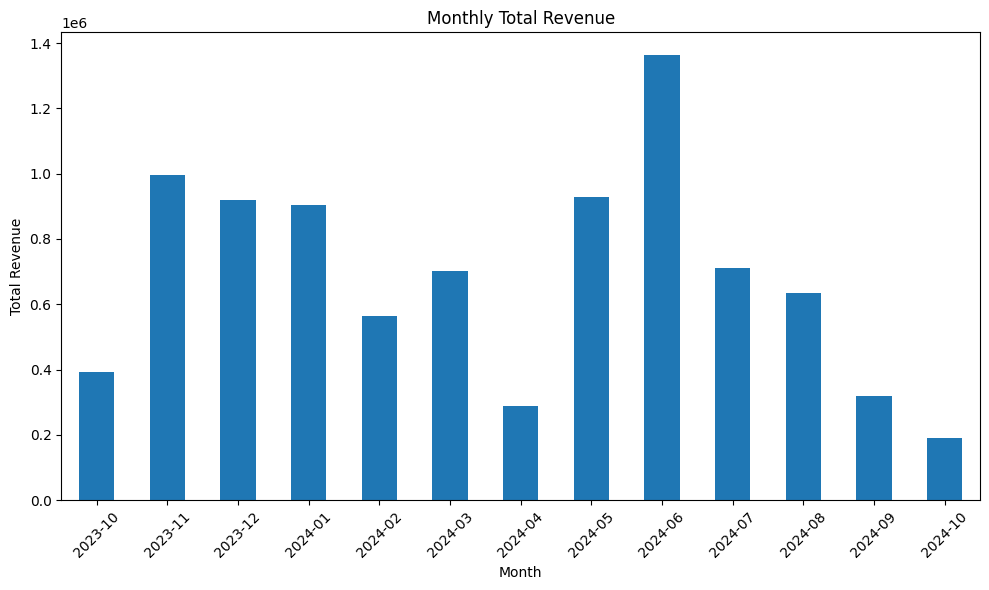

(Category
 Food           1966000
 Electronics    1746000
 Beauty         1493000
 Name: TotalRevenue, dtype: int64,
 Country
 미국      2238000
 독일      1973000
 중국      1766000
 일본      1523000
 대한민국    1419000
 Name: TotalRevenue, dtype: int64)

In [2]:
import matplotlib.pyplot as plt



# 1. 
df['TotalRevenue'] = df['Quantity'] * df['Price']

# 2. 
df['Month'] = df['OrderDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['TotalRevenue'].sum()

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', title='Monthly Total Revenue', xlabel='Month', ylabel='Total Revenue', rot=45)
plt.tight_layout()
plt.show()

#3
category_revenue_sorted = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False)

top_3_categories = category_revenue_sorted.head(3)

country_revenue_sorted = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

# 4
top_5_countries = country_revenue_sorted.head(5)

top_3_categories, top_5_countries






3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [3]:
from datetime import datetime

# 1. 
customer_total_revenue = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False)
top_5_customers_revenue = customer_total_revenue.head(5)

# 2. 
customer_order_count = df['CustomerID'].value_counts()
top_5_customers_orders = customer_order_count.head(5)

# 3. 
current_year = datetime.now().year
df['Age'] = current_year - pd.to_datetime(df['Birthdate'], errors='coerce').dt.year


def categorize_age(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    else:
        return '60 and above'

df['AgeGroup'] = df['Age'].apply(categorize_age)


age_group_category = df.groupby('AgeGroup')['Category'].agg(lambda x: x.value_counts().idxmax())


top_5_customers_revenue, top_5_customers_orders, age_group_category


(CustomerID
 1007    334000
 1354    245000
 1141    241000
 1589    215000
 1632    192000
 Name: TotalRevenue, dtype: int64,
 CustomerID
 1206    2
 1278    2
 1496    2
 1007    2
 1673    2
 Name: count, dtype: int64,
 AgeGroup
 20-29                Beauty
 30-39                  Food
 40-49                 Books
 50-59           Electronics
 60 and above    Electronics
 Name: Category, dtype: object)

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [4]:
# 1. 
top_5_sold_products =df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

# 2. 
most_sold_per_category = df.groupby('Category').apply(
    lambda group: group.groupby('Product')['Quantity'].sum().idxmax()
)

# 3. 
average_quantity_per_product = df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)

top_5_sold_products, most_sold_per_category, average_quantity_per_product

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13588\391043505.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_sold_per_category = df.groupby('Category').apply(


(Product
 셔츠     25
 립스틱    22
 소설     21
 커피     20
 역사책    20
 Name: Quantity, dtype: int64,
 Category
 Beauty          립스틱
 Books            소설
 Clothing         셔츠
 Electronics     노트북
 Food             커피
 Sports         요가매트
 dtype: object,
 Product
 주스      5.0
 자기계발    5.0
 요가매트    4.0
 Name: Quantity, dtype: float64)

5. **시간 분석**
    1. 주문 날짜별로 ** 주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

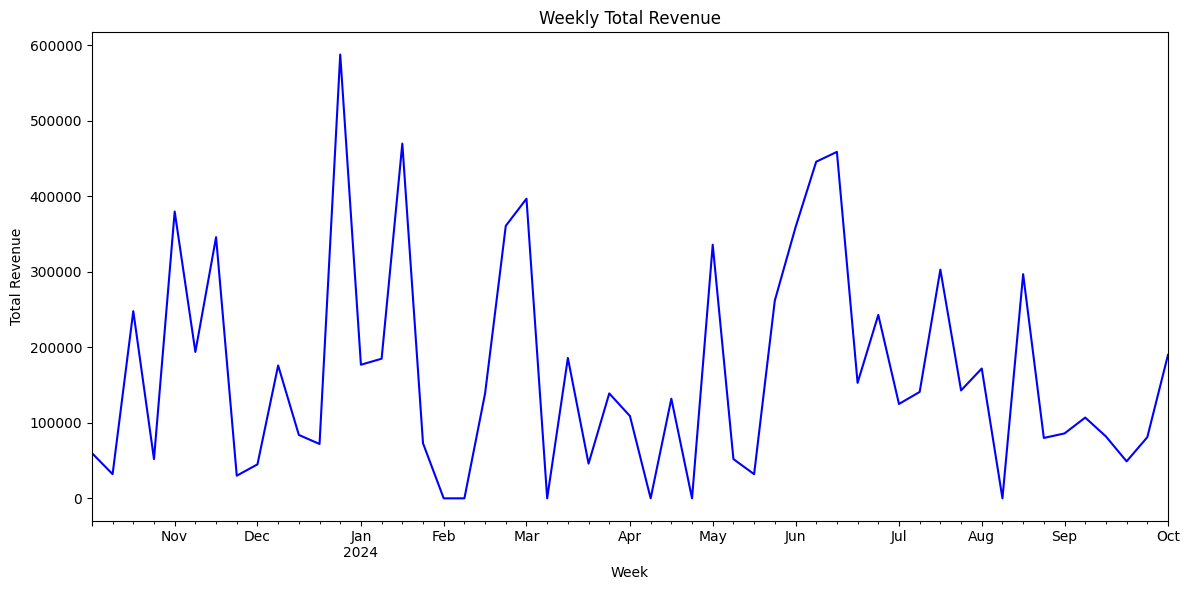

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13588\281307847.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  specific_period_revenue = specific_period.resample('M', on='OrderDate')['TotalRevenue'].sum()


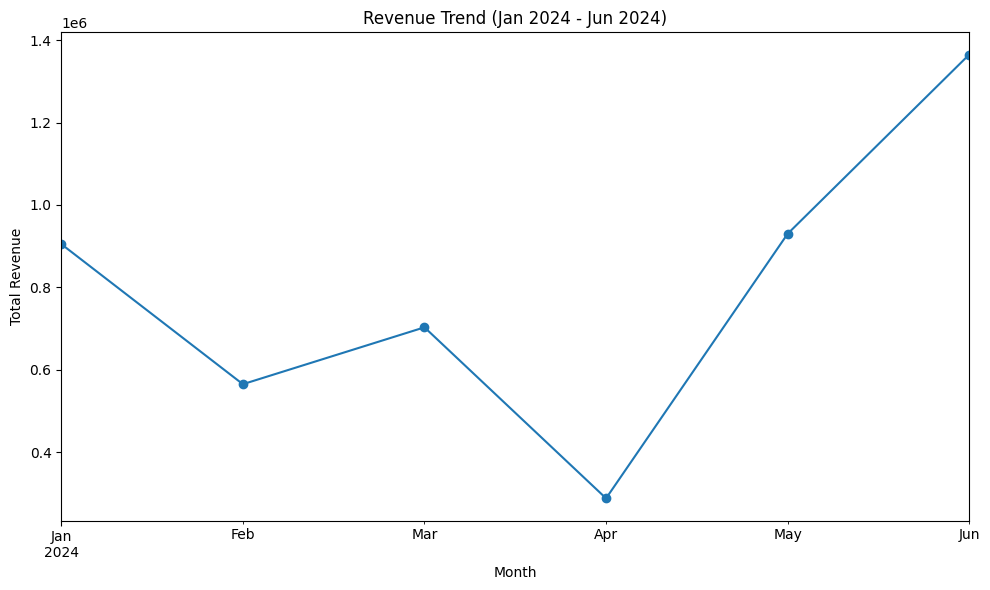

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13588\281307847.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_orders['OrderHour'] = country_orders['OrderDate'].dt.hour


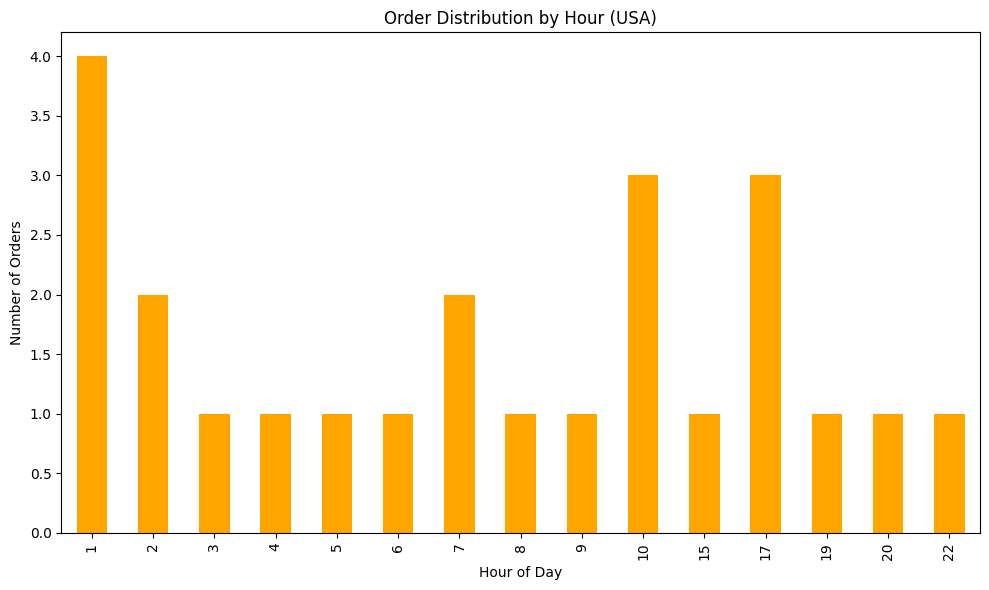

In [5]:
# 1. 
weekly_revenue = df.resample('W', on='OrderDate')['TotalRevenue'].sum()


plt.figure(figsize=(12, 6))
weekly_revenue.plot(title='Weekly Total Revenue', xlabel='Week', ylabel='Total Revenue', color='blue')
plt.tight_layout()
plt.show()

# 2.
specific_period = df[(df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')]
specific_period_revenue = specific_period.resample('M', on='OrderDate')['TotalRevenue'].sum()

 
plt.figure(figsize=(10, 6))
specific_period_revenue.plot(kind='line', marker='o', title='Revenue Trend (Jan 2024 - Jun 2024)', xlabel='Month', ylabel='Total Revenue')
plt.tight_layout()
plt.show()

# 3.
country_orders = df[df['Country'] == '미국']
country_orders['OrderHour'] = country_orders['OrderDate'].dt.hour


hourly_orders = country_orders['OrderHour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar', title='Order Distribution by Hour (USA)', xlabel='Hour of Day', ylabel='Number of Orders', color='orange')
plt.tight_layout()
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [6]:

if 'DiscountRate' in df.columns:
    
    df['DiscountedRevenue'] = df['TotalRevenue'] * (1 - df['DiscountRate'] / 100)
    
   
    discounted_revenue_by_category = df.groupby('Category')['DiscountedRevenue'].sum().sort_values(ascending=False)
else:
    discounted_revenue_by_category = "DiscountRate column not found in the dataset."

# 
discounted_revenue_by_category.reset_index()


,Category,DiscountedRevenue
0,Food,1797729.8
1,Electronics,1743077.3
2,Beauty,1490163.8
3,Books,1375887.8
4,Clothing,1276808.2
5,Sports,1055096.8
